## Descripción General del Dataset VinDr-Mammo

**Origen y Contexto**: VinDr-Mammo es un conjunto de datos de mamografía digital desarrollado en Vietnam, diseñado para apoyar el diagnóstico asistido por computadora (CADx y CADe) en la detección del cáncer de mama. Este dataset tiene como objetivo mejorar la diversidad de los datos de mamografía disponibles públicamente y proporcionar una base sólida para el desarrollo de sistemas de inteligencia artificial en radiología mamaria.

**Tamaño y Composición**: El conjunto de datos consta de 5,000 exámenes de mamografía, cada uno con cuatro vistas estándar (craneocaudal - CC y oblicuo mediolateral - MLO para cada mama), lo que da un total de 20,000 imágenes. Estas imágenes fueron recopiladas de manera retrospectiva de dos hospitales en Hanoi, Vietnam. 

**Anotaciones**: Las imágenes han sido anotadas a nivel de mama y de lesión. Las anotaciones incluyen evaluaciones BI-RADS, categorías de densidad mamaria, y hallazgos específicos como masas, calcificaciones, asimetrías y distorsiones arquitectónicas. Las anotaciones fueron realizadas por radiólogos con experiencia, y en caso de discrepancia entre dos radiólogos, se resolvieron mediante la participación de un tercer radiólogo.

**Evaluación y División de Datos**: El dataset está dividido en un conjunto de entrenamiento con 4,000 exámenes y un conjunto de prueba con 1,000 exámenes. Esta división se realizó para asegurar una correcta estratificación de las características relevantes (BI-RADS, composición mamaria, y hallazgos).

**Acceso y Disponibilidad**: El conjunto de datos está disponible públicamente a través de la plataforma PhysioNet, y las anotaciones están estructuradas en archivos CSV que facilitan el análisis y procesamiento de los datos.

## Proceso de Creación del Dataset

1. **Adquisición de Datos**: Las imágenes fueron obtenidas en formato DICOM y pseudonimizadas para proteger la privacidad del paciente. Se eliminaron todas las informaciones identificables del paciente utilizando scripts de Python.

2. **Lectura y Anotación**: Las imágenes fueron revisadas y anotadas por radiólogos utilizando una herramienta de anotación web específica, llamada VinDr Lab.

3. **Estratificación y División de Datos**: Los exámenes anotados se dividieron en un conjunto de entrenamiento y uno de prueba utilizando un algoritmo de estratificación iterativa, para garantizar una distribución representativa de las características de interés.


![Proceso Creación de los Datos](imagenes/1.png)



## Características Adicionales

- **Diversidad del Dataset**: VinDr-Mammo representa una de las bases de datos públicas más grandes y diversas de mamografía digital de campo completo, con datos de una población vietnamita. Es particularmente valioso para la investigación en entornos de inteligencia artificial, debido a la detallada y extensa anotación de las imágenes.

- **Objetivo del Dataset**: Facilitar el desarrollo y evaluación de herramientas CADe/x para mejorar la precisión en la interpretación de mamografías, especialmente en la detección del cáncer de mama.


## Carga de Datos

In [1]:
# Importación de Librerías
import os
import pandas as pd
import utils

# Acceder a los datos cargados desde utils.py
breast_level_annotations = utils.breast_level_annotations
finding_annotations = utils.finding_annotations
metadata = utils.metadata


print("\nFinding Annotations:")
display(finding_annotations.head())

print("\nMetadata:")
display(metadata.head())

# Cargar las imágenes
lista_imagenes = utils.lista_imagenes_vindr

# Mostrar un resumen de las imágenes disponibles
print(f"\nNúmero de imágenes en la carpeta 'images': {len(lista_imagenes)}")
print(f"Ejemplo de nombres de imágenes: {lista_imagenes[:5]}")



Finding Annotations:


,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training



Metadata:


,SOP Instance UID,Series Instance UID,SOP Instance UID.1,Patient's Age,View Position,Image Laterality,Photometric Interpretation,Rows,Columns,Imager Pixel Spacing,...,Pixel Padding Value,Pixel Padding Range Limit,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type,Window Center & Width Explanation,Manufacturer,Manufacturer's Model Name
0,d8125545210c08e1b1793a5af6458ee2,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,053Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1662,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
1,290c658f4e75a3f83ec78a847414297c,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,053Y,MLO,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1664,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
2,cd0fc7bc53ac632a11643ac4cc91002a,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,053Y,CC,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1600,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
3,71638b1e853799f227492bfb08a01491,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,053Y,MLO,R,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1654,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration
4,dd9ce3288c0773e006a294188aadba8e,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,042Y,CC,L,MONOCHROME2,3518,2800,"[0.085, 0.085]",...,0,NaN,1580,1500,0,1,US,linear LUT,SIEMENS,Mammomat Inspiration



Número de imágenes en la carpeta 'images': 5001
Ejemplo de nombres de imágenes: ['94b8aa8d440fd53eeaba90c90fd7c5a8', 'fcc67ac333b35f981f75ac4ee37bcd23', 'f58ee75d530001771356090077eedbfe', '60c8177e1f4f489c8e14ad6804f8579a', '5a77087143733dea136bff7114889710']


In [2]:
# Usar la ruta de imágenes definida en utils.py
ruta_imagenes = utils.RUTA_IMAGENES_VINDR

# Contar los archivos por subcarpeta utilizando la función de utils
lista_subcarpetas, conteo_archivos = utils.contar_archivos_por_subcarpeta(ruta_imagenes)

# Mostrar un resumen del conteo de archivos por subcarpeta
print(f"Número total de subcarpetas en 'images': {len(lista_subcarpetas)}")
for subcarpeta, conteo in conteo_archivos.items():
    print(f"Subcarpeta '{subcarpeta}' tiene {conteo} archivos.")


Número total de subcarpetas en 'images': 5001
Subcarpeta '94b8aa8d440fd53eeaba90c90fd7c5a8' tiene 4 archivos.
Subcarpeta 'fcc67ac333b35f981f75ac4ee37bcd23' tiene 4 archivos.
Subcarpeta 'f58ee75d530001771356090077eedbfe' tiene 4 archivos.
Subcarpeta '60c8177e1f4f489c8e14ad6804f8579a' tiene 4 archivos.
Subcarpeta '5a77087143733dea136bff7114889710' tiene 4 archivos.
Subcarpeta 'b57a5a2715f6f07f9363e82a1732bd7c' tiene 4 archivos.
Subcarpeta '7c8c4b1c7ba2be573afb41c857118dc6' tiene 4 archivos.
Subcarpeta '672e4a8b265c9d541c39a838a5b23371' tiene 4 archivos.
Subcarpeta '38d9a4124ecc9032f0e55da1a6322bf0' tiene 4 archivos.
Subcarpeta 'f1489fa7dbb76ac5f86fd34462314cf4' tiene 4 archivos.
Subcarpeta 'e5e0f092ba767a07a4086c702d9cd329' tiene 4 archivos.
Subcarpeta '7c3f108bd2ace00dfcdc25f3b43749e8' tiene 4 archivos.
Subcarpeta 'c9a51e3b873f7173cb1236d91df8eff9' tiene 4 archivos.
Subcarpeta '1f3b01c43747f59ae0570a5f99189851' tiene 4 archivos.
Subcarpeta 'db7cc9ccde13b4d76c3facea53bf7cce' tiene 4 arch

In [3]:
import os

# Definir la ruta a la carpeta donde se encuentra el dataset
ruta_vindr = utils.RUTA_VINDR
# Cargar las imágenes
# Usar la ruta de imágenes definida en utils.py
ruta_imagenes = utils.RUTA_IMAGENES_VINDR

# Obtener la lista de subcarpetas dentro de 'images'
lista_subcarpetas = os.listdir(ruta_imagenes)

# Crear un diccionario para almacenar el conteo de archivos por subcarpeta
conteo_archivos = {}

# Recorrer cada subcarpeta y contar los archivos
for subcarpeta in lista_subcarpetas:
    ruta_subcarpeta = os.path.join(ruta_imagenes, subcarpeta)
    if os.path.isdir(ruta_subcarpeta):  # Asegurarse de que es una carpeta
        archivos = os.listdir(ruta_subcarpeta)
        conteo_archivos[subcarpeta] = len(archivos)

# Verificar y mostrar solo las subcarpetas que tienen menos o más de 4 archivos
subcarpetas_diferente_de_4 = {subcarpeta: conteo for subcarpeta, conteo in conteo_archivos.items() if conteo != 4}

# Mostrar el resultado
if subcarpetas_diferente_de_4:
    print("Subcarpetas que tienen menos o más de 4 archivos:")
    for subcarpeta, conteo in subcarpetas_diferente_de_4.items():
        print(f"Subcarpeta '{subcarpeta}' tiene {conteo} archivos.")
else:
    print("Todas las subcarpetas tienen exactamente 4 archivos.")

Todas las subcarpetas tienen exactamente 4 archivos.


### Metadata.csv

# Resumen del archivo `metadata.csv`

El archivo `metadata.csv` contiene información detallada sobre las imágenes de mamografías incluidas en el dataset VinDr-Mammo. 

## Contenido del archivo:
- **Identificadores únicos**: Incluye identificadores únicos para cada imagen (`SOP Instance UID`) y para la serie de imágenes a la que pertenecen (`Series Instance UID`), lo que permite rastrear y relacionar las imágenes dentro del sistema.
- **Información del paciente**: Registra la edad del paciente (`Patient's Age`) en el momento en que se tomó la imagen.
- **Detalles de la imagen**: Proporciona información sobre la posición de la vista de la imagen (`View Position`), la lateralidad (`Image Laterality`), y la interpretación fotométrica (`Photometric Interpretation`), entre otros detalles técnicos como la resolución (`Rows`, `Columns`) y el espaciado de píxeles (`Imager Pixel Spacing`).
- **Propiedades de la imagen**: Incluye datos relacionados con la visualización de la imagen, como el centro y ancho de la ventana de visualización (`Window Center`, `Window Width`), y detalles sobre la recalibración de los datos de la imagen (`Rescale Intercept`, `Rescale Slope`).
- **Fabricante del equipo**: Registra el fabricante y el modelo del equipo utilizado para capturar la imagen (`Manufacturer`, `Manufacturer's Model Name`).



#### Descripción de las columnas en el archivo `metadata.csv`

- **SOP Instance UID**: Identificador único de la imagen dentro de una serie específica en el sistema PACS (Picture Archiving and Communication System).
- **Series Instance UID**: Identificador único de la serie de imágenes a la que pertenece la imagen.
- **SOP Instance UID.1**: Repetición del identificador único de la imagen, posiblemente un error o redundancia en los datos.
- **Patient's Age**: Edad del paciente al momento de la toma de la imagen, expresada en años (por ejemplo, "053Y" significa 53 años).
- **View Position**: Posición de la vista de la imagen mamográfica, como CC (craneocaudal) o MLO (mediolateral oblicua).
- **Image Laterality**: Lateralidad de la imagen, indica si la imagen es del seno izquierdo (L) o derecho (R).
- **Photometric Interpretation**: Indica el tipo de interpretación fotométrica de la imagen, en este caso, "MONOCHROME2", que se refiere a una imagen en escala de grises.
- **Rows**: Número de filas en la imagen, que representa la resolución vertical.
- **Columns**: Número de columnas en la imagen, que representa la resolución horizontal.
- **Imager Pixel Spacing**: Espaciado de los píxeles en la imagen, dado en milímetros, que indica la resolución espacial.
- **Pixel Padding Value**: Valor de relleno de píxeles, usado para identificar áreas de la imagen que no contienen datos relevantes.
- **Pixel Padding Range Limit**: Límite del rango de valores de relleno de píxeles, aunque en este archivo parece que no se utiliza (valor NaN).
- **Window Center**: Centro de la ventana de visualización que ajusta el brillo de la imagen.
- **Window Width**: Ancho de la ventana de visualización que ajusta el contraste de la imagen.
- **Rescale Intercept**: Valor de intercepto para la recalibración de los datos de la imagen.
- **Rescale Slope**: Pendiente utilizada en la recalibración de los valores de la imagen.
- **Rescale Type**: Tipo de reescalado aplicado a la imagen, en este caso, "US" que puede referirse a una unidad específica de medida.
- **Window Center & Width Explanation**: Explicación del uso del centro y el ancho de la ventana, por ejemplo, "linear LUT" indica que se utiliza una tabla de consulta lineal para el mapeo de tonos.
- **Manufacturer**: Fabricante del equipo que generó la imagen, como "SIEMENS".
- **Manufacturer's Model Name**: Nombre del modelo del equipo utilizado para generar la imagen, por ejemplo, "Mammomat Inspiration".


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")


# Cargar el archivo metadata.csv
metadata_df = utils.metadata

# Calcular el conteo de valores no nulos, nulos y únicos por columna
non_null_counts_metadata = metadata_df.notnull().sum()
null_counts_metadata = metadata_df.isnull().sum()
unique_counts_metadata = metadata_df.nunique()

# Crear un DataFrame con los resultados
summary_metadata_df = pd.DataFrame({
    'Non-Null Count': non_null_counts_metadata,
    'Null Count': null_counts_metadata,
    'Unique Count': unique_counts_metadata
})

# Mostrar el DataFrame con el resumen
print(summary_metadata_df)



                                   Non-Null Count  Null Count  Unique Count
SOP Instance UID                            20000           0         20000
Series Instance UID                         20000           0          5036
SOP Instance UID.1                          20000           0         20000
Patient's Age                               17740        2260            73
View Position                               20000           0             2
Image Laterality                            20000           0             2
Photometric Interpretation                  20000           0             2
Rows                                        20000           0             3
Columns                                     20000           0            58
Imager Pixel Spacing                        20000           0             5
Pixel Spacing                                3872       16128             2
Pixel Padding Value                         20000           0             2
Pixel Paddin

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/1187840347.py:2: SyntaxWarning: invalid escape sequence '\d'
  metadata_df['Patient\'s Age'] = metadata_df['Patient\'s Age'].str.extract('(\d+)')
/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/1187840347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_df['Patient\'s Age'] = metadata_df['Patient\'s Age'].astype(int)


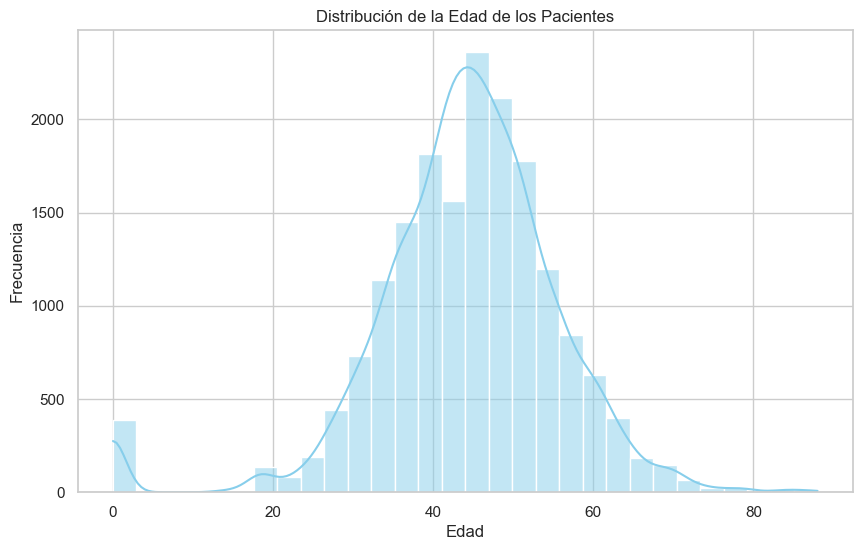

In [5]:
# Limpiar la columna 'Patient\'s Age' eliminando las filas con valores nulos antes de convertirlas a enteros
metadata_df['Patient\'s Age'] = metadata_df['Patient\'s Age'].str.extract('(\d+)')
metadata_df = metadata_df.dropna(subset=['Patient\'s Age'])
metadata_df['Patient\'s Age'] = metadata_df['Patient\'s Age'].astype(int)

# Crear el gráfico de distribución de la edad de los pacientes
plt.figure(figsize=(10, 6))
sns.histplot(metadata_df['Patient\'s Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de la Edad de los Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Archivo 'metadata.csv' cargado exitosamente.


/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/3622727351.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metadata_df, y='Window Center & Width Explanation', palette='viridis')
/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/3622727351.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metadata_df, y='Manufacturer', palette='magma')
/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/3622727351.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metadata_df, y='Manu

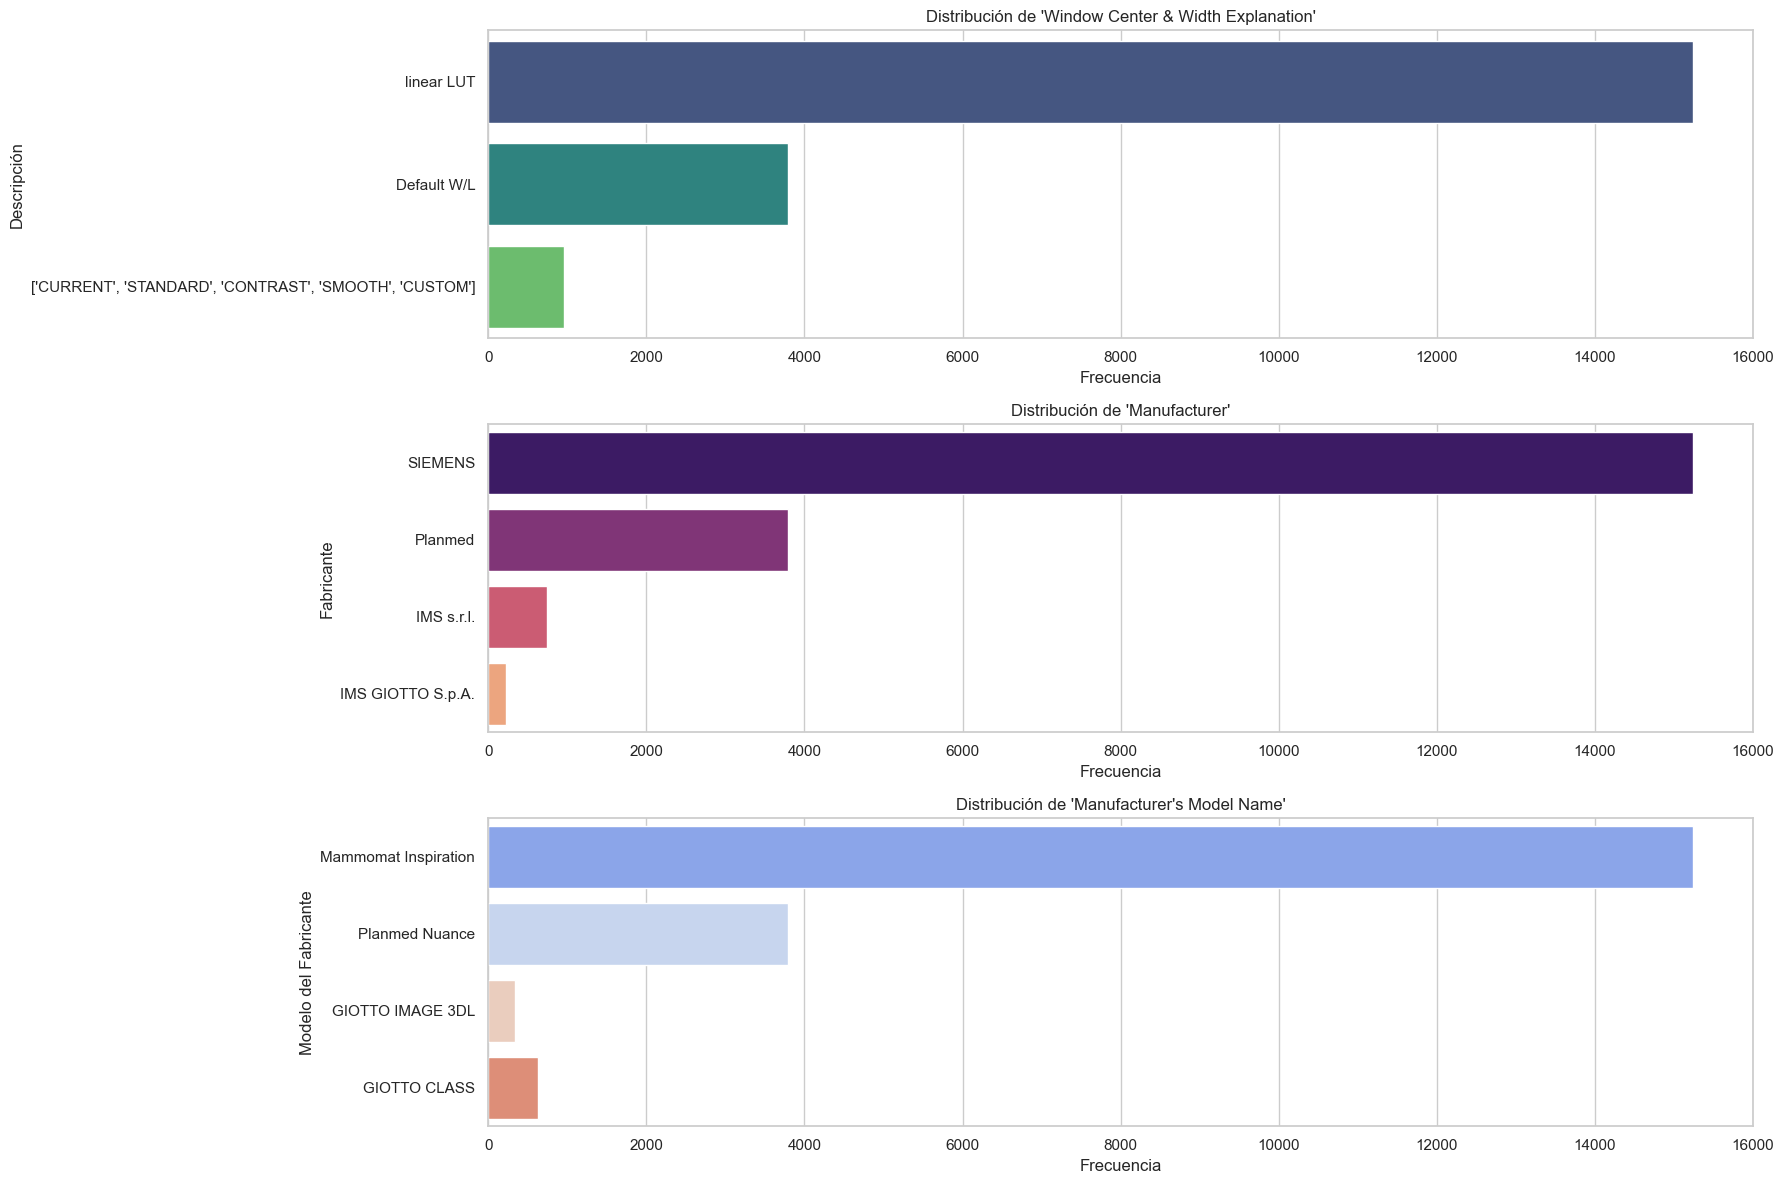

In [6]:

import seaborn as sns

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")


try:
    metadata_df = utils.metadata
    print("Archivo 'metadata.csv' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{utils.metadata}' no se encontró.")
    exit()

# Crear una figura con subplots
plt.figure(figsize=(18, 12))

# Gráfico para 'Window Center & Width Explanation'
plt.subplot(3, 1, 1)
sns.countplot(data=metadata_df, y='Window Center & Width Explanation', palette='viridis')
plt.title("Distribución de 'Window Center & Width Explanation'")
plt.xlabel("Frecuencia")
plt.ylabel("Descripción")

# Gráfico para 'Manufacturer'
plt.subplot(3, 1, 2)
sns.countplot(data=metadata_df, y='Manufacturer', palette='magma')
plt.title("Distribución de 'Manufacturer'")
plt.xlabel("Frecuencia")
plt.ylabel("Fabricante")

# Gráfico para 'Manufacturer\'s Model Name'
plt.subplot(3, 1, 3)
sns.countplot(data=metadata_df, y='Manufacturer\'s Model Name', palette='coolwarm')
plt.title("Distribución de 'Manufacturer\'s Model Name'")
plt.xlabel("Frecuencia")
plt.ylabel("Modelo del Fabricante")

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


Archivo 'metadata.csv' cargado exitosamente.


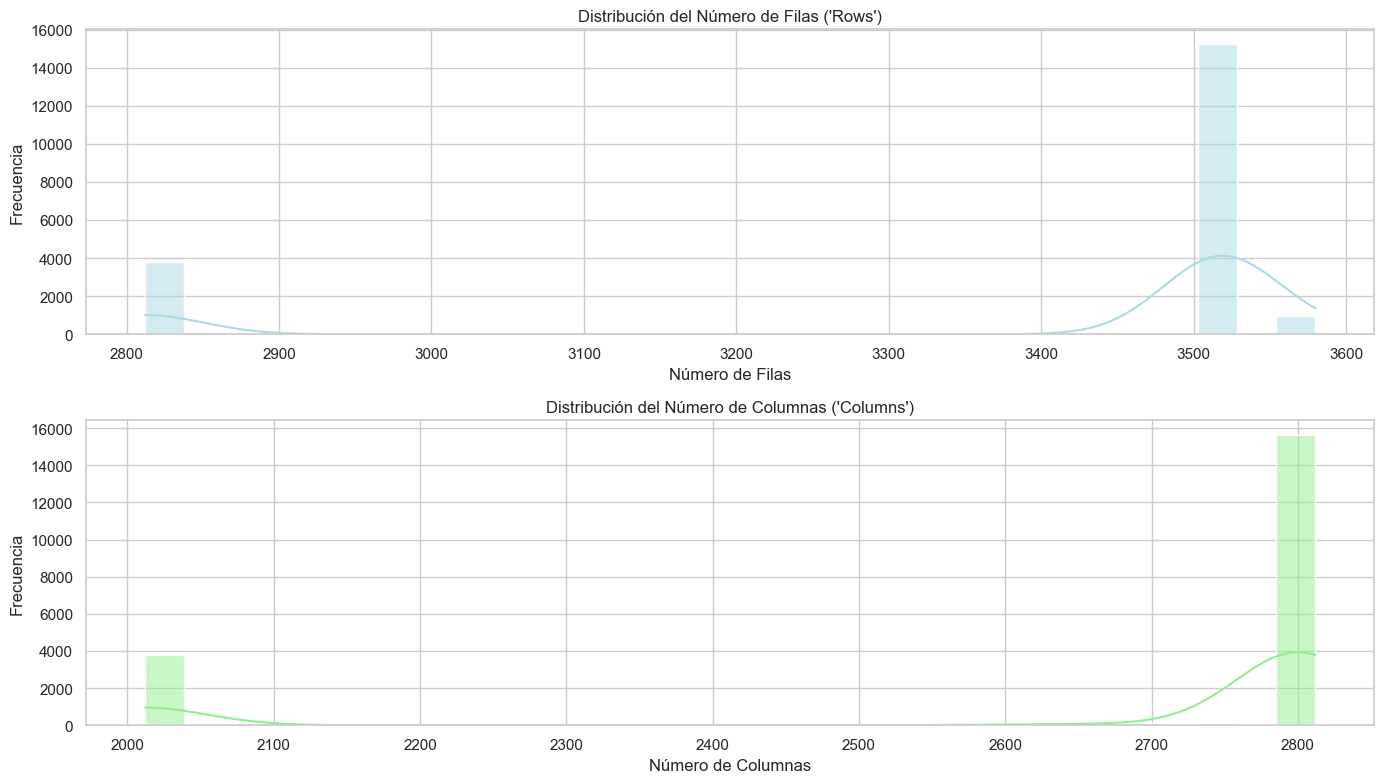

In [7]:


# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Cargar el Archivo CSV

try:
    metadata_df = utils.metadata
    print("Archivo 'metadata.csv' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{utils.metadata}' no se encontró.")
    exit()

# Crear una figura con subplots
plt.figure(figsize=(14, 8))

# Gráfico para 'Rows'
plt.subplot(2, 1, 1)
sns.histplot(metadata_df['Rows'], bins=30, kde=True, color='lightblue')
plt.title("Distribución del Número de Filas ('Rows')")
plt.xlabel("Número de Filas")
plt.ylabel("Frecuencia") 

# Gráfico para 'Columns'
plt.subplot(2, 1, 2)
sns.histplot(metadata_df['Columns'], bins=30, kde=True, color='lightgreen')
plt.title("Distribución del Número de Columnas ('Columns')")
plt.xlabel("Número de Columnas")
plt.ylabel("Frecuencia")

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


### breast-level_annotations.csv 

El archivo breast-level_annotations.csv es un conjunto de datos que contiene anotaciones detalladas a nivel de cada imagen de mamografía. Estas anotaciones incluyen información clave sobre la identificación, la calidad y las características de las imágenes, así como clasificaciones específicas relacionadas con la densidad del tejido mamario y la evaluación del riesgo de cáncer.



1. **study_id**: Identificador único para cada estudio de mamografía. Un estudio puede incluir varias imágenes relacionadas.

2. **series_id**: Identificador único para cada serie de imágenes dentro de un estudio. Una serie puede consistir en varias imágenes obtenidas en una sesión específica.

3. **image_id**: Identificador único para cada imagen individual en el dataset. Este ID es exclusivo para cada imagen y permite su rastreo y referencia.

4. **laterality**: Indica la lateralidad de la imagen, es decir, si la imagen corresponde al seno izquierdo (L) o derecho (R).

5. **view_position**: Posición de la vista de la imagen mamográfica. Las posiciones comunes incluyen:
   - **CC**: Craneocaudal (vista de arriba hacia abajo).
   - **MLO**: Mediolateral oblicua (vista en ángulo).

6. **height**: Altura de la imagen en píxeles. Es un valor numérico que indica la resolución vertical de la imagen.

7. **width**: Anchura de la imagen en píxeles. Es un valor numérico que indica la resolución horizontal de la imagen.

8. **breast_birads**: Clasificación BI-RADS (Breast Imaging Reporting and Data System) del tejido mamario, que indica la probabilidad de malignidad de las anomalías encontradas en la imagen:
   - **BI-RADS 1**: Negativo.
   - **BI-RADS 2**: Hallazgos benignos.
   - **BI-RADS 3**: Probablemente benigno.
   - **BI-RADS 4**: Sospechoso.
   - **BI-RADS 5**: Altamente sospechoso de malignidad.

9. **breast_density**: Clasificación de la densidad del tejido mamario, lo que puede afectar la precisión de la mamografía:
   - **DENSITY A**: Predominantemente tejido adiposo.
   - **DENSITY B**: Algunas áreas de tejido fibroglandular disperso.
   - **DENSITY C**: Tejido fibroglandular heterogéneo.
   - **DENSITY D**: Densidad extremadamente alta, lo que puede disminuir la sensibilidad de la mamografía.

10. **split**: Indica si la imagen pertenece al conjunto de entrenamiento ("training") o al conjunto de prueba ("test"), lo que se utiliza para la división de datos en la fase de desarrollo y evaluación de modelos.


In [8]:

# Calcular el conteo de valores no nulos, nulos y únicos por columna
non_null_counts = breast_level_annotations.notnull().sum()
null_counts = breast_level_annotations.isnull().sum()
unique_counts = breast_level_annotations.nunique()

# Crear un DataFrame con los resultados
summary_df = pd.DataFrame({
    'Non-Null Count': non_null_counts,
    'Null Count': null_counts,
    'Unique Count': unique_counts
})

# Mostrar el DataFrame con el resumen
print(summary_df)


                Non-Null Count  Null Count  Unique Count
study_id                 20000           0          5000
series_id                20000           0          5036
image_id                 20000           0         20000
laterality               20000           0             2
view_position            20000           0             2
height                   20000           0             3
width                    20000           0            58
breast_birads            20000           0             5
breast_density           20000           0             4
split                    20000           0             2


In [9]:


# 1. Cargar el Archivo CSV

annotations_df = utils.breast_level_annotations

# 2. Conteo de valores en la columna 'laterality' (Lado de la mama: L o R)
laterality_counts = annotations_df['laterality'].value_counts()
print("Conteo de L y R en la columna 'laterality':")
print(laterality_counts)

# 3. Conteo de valores en la columna 'view_position' (Posición de la vista: CC o MLO)
view_position_counts = annotations_df['view_position'].value_counts()
print("\nConteo de CC y MLO en la columna 'view_position':")
print(view_position_counts)

# 4. Conteo de valores en la columna 'breast_density' (Densidad mamaria: A, B, C, D)
breast_density_counts = annotations_df['breast_density'].value_counts()
print("\nConteo de valores en la columna 'breast_density':")
print(breast_density_counts)

# 5. Conteo de valores en la columna 'split' (División en conjunto de entrenamiento y prueba: training o test)
split_counts = annotations_df['split'].value_counts()
print("\nConteo de valores en la columna 'split':")
print(split_counts)

# 6. Conteo de valores en la columna 'breast_birads' (Categoría BI-RADS: 1, 2, 3, 4, 5, etc.)
birads_counts = annotations_df['breast_birads'].value_counts()
print("\nConteo de valores en la columna 'breast_birads':")
print(birads_counts)


Conteo de L y R en la columna 'laterality':
laterality
L    10000
R    10000
Name: count, dtype: int64

Conteo de CC y MLO en la columna 'view_position':
view_position
CC     10001
MLO     9999
Name: count, dtype: int64

Conteo de valores en la columna 'breast_density':
breast_density
DENSITY C    15292
DENSITY D     2700
DENSITY B     1908
DENSITY A      100
Name: count, dtype: int64

Conteo de valores en la columna 'split':
split
training    16000
test         4000
Name: count, dtype: int64

Conteo de valores en la columna 'breast_birads':
breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: count, dtype: int64


/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/2674822269.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=breast_level_annotations, y='breast_birads', palette='Blues')
/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/2674822269.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=breast_level_annotations, y='breast_density', palette='Greens')
/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/2674822269.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=breast_level_

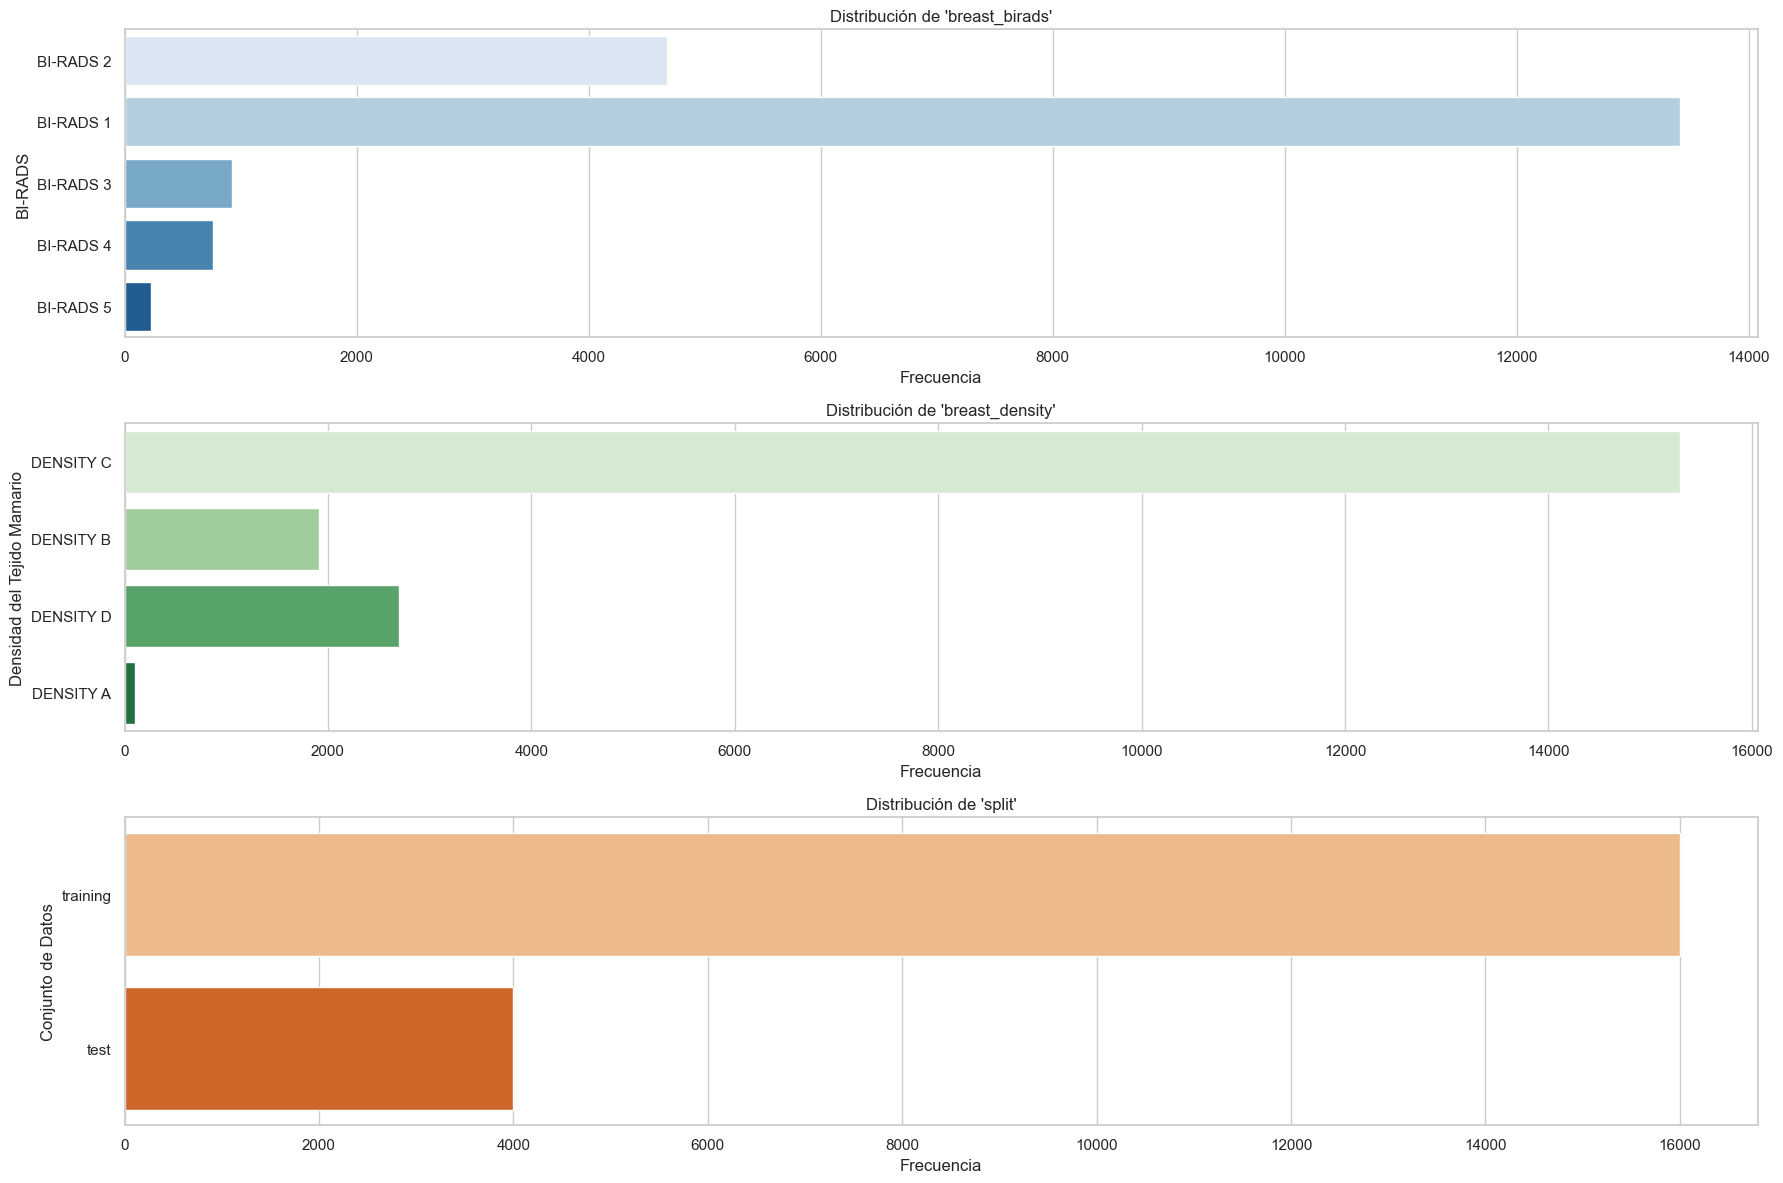

In [10]:

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")

# Crear gráficos de frecuencia para las columnas 'breast_birads', 'breast_density' y 'split'

# Crear una figura con subplots
plt.figure(figsize=(18, 12))

# Gráfico para 'breast_birads'
plt.subplot(3, 1, 1)
sns.countplot(data=breast_level_annotations, y='breast_birads', palette='Blues')
plt.title("Distribución de 'breast_birads'")
plt.xlabel("Frecuencia")
plt.ylabel("BI-RADS")

# Gráfico para 'breast_density'
plt.subplot(3, 1, 2)
sns.countplot(data=breast_level_annotations, y='breast_density', palette='Greens')
plt.title("Distribución de 'breast_density'")
plt.xlabel("Frecuencia")
plt.ylabel("Densidad del Tejido Mamario")

# Gráfico para 'split'
plt.subplot(3, 1, 3)
sns.countplot(data=breast_level_annotations, y='split', palette='Oranges')
plt.title("Distribución de 'split'")
plt.xlabel("Frecuencia")
plt.ylabel("Conjunto de Datos")

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


### Finding_annotations.csv 

### Descripción de las columnas en `finding_annotations.csv`

1. **study_id**: Identificador único para cada estudio de mamografía. Un estudio puede incluir varias imágenes relacionadas.

2. **series_id**: Identificador único para cada serie de imágenes dentro de un estudio. Una serie puede consistir en varias imágenes obtenidas en una sesión específica.

3. **image_id**: Identificador único para cada imagen individual en el dataset. Este ID es exclusivo para cada imagen y permite su rastreo y referencia.

4. **laterality**: Indica la lateralidad de la imagen, es decir, si la imagen corresponde al seno izquierdo (L) o derecho (R).

5. **view_position**: Posición de la vista de la imagen mamográfica. Las posiciones comunes incluyen:
   - **CC**: Craneocaudal (vista de arriba hacia abajo).
   - **MLO**: Mediolateral oblicua (vista en ángulo).

6. **height**: Altura de la imagen en píxeles. Es un valor numérico que indica la resolución vertical de la imagen.

7. **width**: Anchura de la imagen en píxeles. Es un valor numérico que indica la resolución horizontal de la imagen.

8. **breast_birads**: Clasificación BI-RADS (Breast Imaging Reporting and Data System) del tejido mamario, que indica la probabilidad de malignidad de las anomalías encontradas en la imagen.

9. **breast_density**: Clasificación de la densidad del tejido mamario, lo que puede afectar la precisión de la mamografía.

10. **finding_categories**: Categorías de hallazgos anotados en la imagen. Esto puede incluir diferentes tipos de anomalías o lesiones detectadas en la mamografía.

11. **finding_birads**: Clasificación BI-RADS específica para cada hallazgo, indicando la probabilidad de que un hallazgo sea maligno.

12. **xmin, ymin, xmax, ymax**: Coordenadas que definen el cuadro delimitador (bounding box) alrededor de un hallazgo en la imagen. Estas coordenadas indican la posición y tamaño del hallazgo.

13. **split**: Indica si la imagen pertenece al conjunto de entrenamiento ("training") o al conjunto de prueba ("test"), lo que se utiliza para la división de datos en la fase de desarrollo y evaluación de modelos.


In [11]:
# Configuración de estilo para las gráficas
sns.set(style="whitegrid")


finding_df = utils.finding_annotations

# Calcular el conteo de valores no nulos, nulos y únicos por columna
non_null_counts_finding = finding_df.notnull().sum()
null_counts_finding = finding_df.isnull().sum()
unique_counts_finding = finding_df.nunique()

# Crear un DataFrame con los resultados
summary_finding_df = pd.DataFrame({
    'Non-Null Count': non_null_counts_finding,
    'Null Count': null_counts_finding,
    'Unique Count': unique_counts_finding
})

# Mostrar el DataFrame con el resumen
print(summary_finding_df)

                    Non-Null Count  Null Count  Unique Count
study_id                     20486           0          5000
series_id                    20486           0          5036
image_id                     20486           0         20000
laterality                   20486           0             2
view_position                20486           0             2
height                       20486           0             3
width                        20486           0            58
breast_birads                20486           0             5
breast_density               20486           0             4
finding_categories           20486           0            35
finding_birads                2129       18357             3
xmin                          2254       18232          2244
ymin                          2254       18232          2241
xmax                          2254       18232          2243
ymax                          2254       18232          2238
split                   

Total de filas con una sola categoría: 20312
Total de filas con dos o más categorías: 174

Conteo específico de categorías con una sola cadena:
['No Finding']: 18232
['Mass']: 1123
['Suspicious Calcification']: 402
['Focal Asymmetry']: 232
['Architectural Distortion']: 95
['Asymmetry']: 90
['Suspicious Lymph Node']: 57
['Skin Thickening']: 38
['Global Asymmetry']: 24
['Nipple Retraction']: 12
['Skin Retraction']: 7

Conteo específico de combinaciones de categorías con dos o más cadenas:
Suspicious Calcification, Mass: 82
Suspicious Calcification, Focal Asymmetry: 31
Suspicious Calcification, Architectural Distortion: 13
Skin Thickening, Nipple Retraction: 6
Skin Thickening, Focal Asymmetry: 4
Suspicious Calcification, Nipple Retraction, Mass: 4
Suspicious Calcification, Architectural Distortion, Mass: 4
Nipple Retraction, Mass: 3
Skin Retraction, Skin Thickening: 3
Suspicious Calcification, Asymmetry: 3
Skin Retraction, Nipple Retraction, Mass: 3
Architectural Distortion, Mass: 2
Skin 

/var/folders/ds/4z7lc9ld4mqb377_3t2v4lxm0000gn/T/ipykernel_19772/3600199453.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=single_category_counts.index, y=single_category_counts.values, palette='Set2')


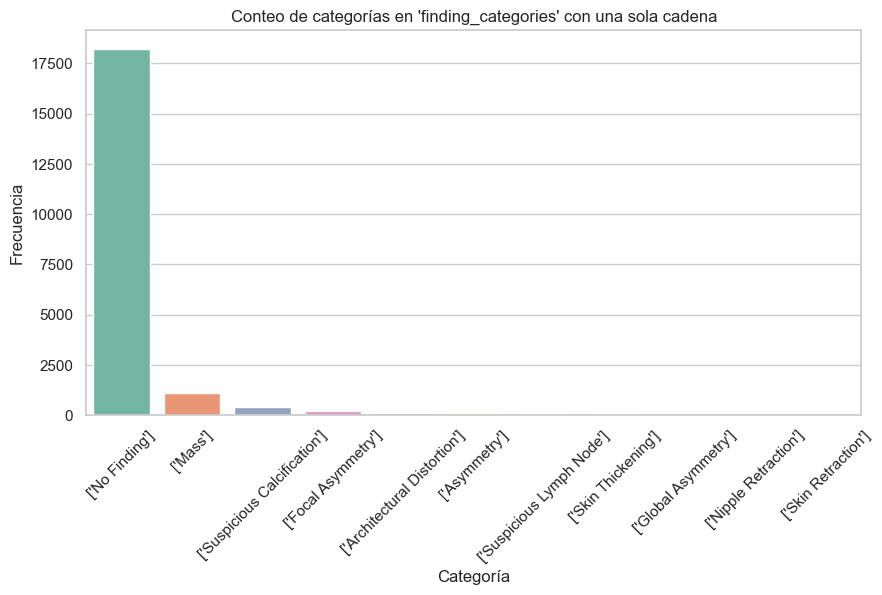

In [12]:

annotations_df = utils.finding_annotations

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# 2. Contar los valores en la columna 'finding_categories'
# Contar cuántos tienen una cadena y cuántos tienen dos o más
annotations_df['num_categories'] = annotations_df['finding_categories'].apply(lambda x: len(eval(x)))

single_category = annotations_df[annotations_df['num_categories'] == 1]
multiple_categories = annotations_df[annotations_df['num_categories'] > 1]

# Conteo de categorías con una sola cadena
single_category_counts = single_category['finding_categories'].value_counts()

# Conteo de categorías con dos o más cadenas
multiple_category_counts = multiple_categories['finding_categories'].apply(lambda x: ', '.join(eval(x))).value_counts()


# Conteo total de filas con una y dos o más categorías
single_category_count = len(single_category)
multiple_categories_count = len(multiple_categories)

print(f"Total de filas con una sola categoría: {single_category_count}")
print(f"Total de filas con dos o más categorías: {multiple_categories_count}")

# 4. Printear la cantidad específica de cada categoría en 'finding_categories'

print("\nConteo específico de categorías con una sola cadena:")
for category, count in single_category_counts.items():
    print(f"{category}: {count}")

print("\nConteo específico de combinaciones de categorías con dos o más cadenas:")
for category, count in multiple_category_counts.items():
    print(f"{category}: {count}")


# Gráfico de categorías con una sola cadena
plt.figure(figsize=(10, 5))
sns.barplot(x=single_category_counts.index, y=single_category_counts.values, palette='Set2')
plt.title("Conteo de categorías en 'finding_categories' con una sola cadena")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


In [13]:
import IPython.display as display

citation = """Nguyen, H. T., Nguyen, H. Q., Pham, H. H., Lam, K., Le, L. T., Dao, M., & Vu, V. (2022). VinDr-Mammo: A large-scale benchmark dataset for computer-aided diagnosis in full-field digital mammography. *medRxiv*. https://doi.org/10.1101/2022.03.07.22272009"""

display.Markdown(citation)


Nguyen, H. T., Nguyen, H. Q., Pham, H. H., Lam, K., Le, L. T., Dao, M., & Vu, V. (2022). VinDr-Mammo: A large-scale benchmark dataset for computer-aided diagnosis in full-field digital mammography. *medRxiv*. https://doi.org/10.1101/2022.03.07.22272009

xd